# Imported Raw Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dataset/PDS_data1.csv')
df

,Year,Inflation Rate (%),Population,Unemployment Rate (%),Youth Unemployment Rate (%),Labor Participation Rate (%),GDP Growth Rate (%),Poverty Rate (%)
0,2023,NaN,"34,308,525",NaN,NaN,NaN,NaN,NaN
1,2022,3.38%,"33,938,221",3.73%,11.70%,43.49%,8.69%,NaN
2,2021,2.48%,"33,573,874",4.05%,12.44%,43.12%,3.09%,NaN
3,2020,-1.14%,"33,199,993",4.54%,12.61%,42.73%,-5.53%,NaN
4,2019,0.66%,"32,804,020",3.26%,11.27%,45.63%,4.41%,NaN
...,...,...,...,...,...,...,...,...
69,1954,NaN,"6,605,394",NaN,NaN,NaN,NaN,NaN
70,1953,NaN,"6,435,027",NaN,NaN,NaN,NaN,NaN
71,1952,NaN,"6,273,219",NaN,NaN,NaN,NaN,NaN
72,1951,NaN,"6,118,736",NaN,NaN,NaN,NaN,NaN


# Filter Data for the Years Between 2012 to 2023

In [ ]:
# Convert 'Year' column to numeric type (if it's not already)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Filter data for the years between 2018 and 2023
filtered_data = df[(df['Year'] >= 2012) & (df['Year'] <= 2024)]

print(filtered_data)

    Year Inflation Rate (%)  Population Unemployment Rate (%)  \
0   2023                NaN  34,308,525                   NaN   
1   2022              3.38%  33,938,221                 3.73%   
2   2021              2.48%  33,573,874                 4.05%   
3   2020             -1.14%  33,199,993                 4.54%   
4   2019              0.66%  32,804,020                 3.26%   
5   2018              0.88%  32,399,271                 3.30%   
6   2017              3.87%  31,975,806                 3.41%   
7   2016              2.09%  31,526,418                 3.44%   
8   2015              2.10%  31,068,833                 3.10%   
9   2014              3.14%  30,606,459                 2.88%   
10  2013              2.11%  30,134,807                 3.16%   
11  2012              1.66%  29,660,212                 3.10%   

   Youth Unemployment Rate (%) Labor Participation Rate (%)  \
0                          NaN                          NaN   
1                       11.7

# Add Missing Values (Data obtained from other sources)

In [ ]:
#Adding missing poverty data obtained from external sources and added into the exisiting dataset


missing_poverty_data = pd.DataFrame({
    'Year': [2012, 2014, 2016, 2017, 2019, 2020, 2021, 2022],  # Years with available poverty rates
    'Poverty Rate (%)': [1.7, 0.6, 0.4, 3.8, 5.6, 8.4, 8.2, 6.2]  # Poverty rates corresponding to the years
})

# Set 'Year' column as the index in the existing DataFrame (if it's not already)
filtered_data.set_index('Year', inplace=True)

# Update the 'Poverty Rate (%)' column in the existing DataFrame with new data
for index, row in missing_poverty_data.iterrows():
    if row['Year'] in filtered_data.index:
        filtered_data.loc[row['Year'], 'Poverty Rate (%)'] = row['Poverty Rate (%)']

# Reset the index (if needed)
filtered_data.reset_index(inplace=True)

# Display the updated DataFrame
print(filtered_data)

    Year Inflation Rate (%)  Population Unemployment Rate (%)  \
0   2023                NaN  34,308,525                   NaN   
1   2022              3.38%  33,938,221                 3.73%   
2   2021              2.48%  33,573,874                 4.05%   
3   2020             -1.14%  33,199,993                 4.54%   
4   2019              0.66%  32,804,020                 3.26%   
5   2018              0.88%  32,399,271                 3.30%   
6   2017              3.87%  31,975,806                 3.41%   
7   2016              2.09%  31,526,418                 3.44%   
8   2015              2.10%  31,068,833                 3.10%   
9   2014              3.14%  30,606,459                 2.88%   
10  2013              2.11%  30,134,807                 3.16%   
11  2012              1.66%  29,660,212                 3.10%   

   Youth Unemployment Rate (%) Labor Participation Rate (%)  \
0                          NaN                          NaN   
1                       11.7

<ipython-input-10-c17de4f7a408>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[row['Year'], 'Poverty Rate (%)'] = row['Poverty Rate (%)']


# Removing Extraneous Symbol From Data

In [ ]:
#keeping only numerical values without (%, $/B)

def remove_symbols(cell):
    if isinstance(cell, str):  # Check if cell contains a string
        return cell.replace('%', '').replace('$', '').replace('B', '')
    return cell

# Remove symbols for all columns except column titles
preprocessed_data = filtered_data.applymap(remove_symbols)

# Display the updated DataFrame
print(preprocessed_data)

    Year Inflation Rate (%)  Population Unemployment Rate (%)  \
0   2023                NaN  34,308,525                   NaN   
1   2022               3.38  33,938,221                  3.73   
2   2021               2.48  33,573,874                  4.05   
3   2020              -1.14  33,199,993                  4.54   
4   2019               0.66  32,804,020                  3.26   
5   2018               0.88  32,399,271                  3.30   
6   2017               3.87  31,975,806                  3.41   
7   2016               2.09  31,526,418                  3.44   
8   2015               2.10  31,068,833                  3.10   
9   2014               3.14  30,606,459                  2.88   
10  2013               2.11  30,134,807                  3.16   
11  2012               1.66  29,660,212                  3.10   

   Youth Unemployment Rate (%) Labor Participation Rate (%)  \
0                          NaN                          NaN   
1                        11.

# Imputation Technique (Mean) to Fill Up Data For Year 2023

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)', 'Labor Participation Rate (%)', 'Poverty Rate (%)']
preprocessed_data[numeric_columns] = preprocessed_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Impute missing values in numeric columns with the mean
preprocessed_data.fillna(preprocessed_data.mean(), inplace=True)
preprocessed_data

<ipython-input-12-822df9dd30bc>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocessed_data.fillna(preprocessed_data.mean(), inplace=True)


,Year,Inflation Rate (%),Population,Unemployment Rate (%),Youth Unemployment Rate (%),Labor Participation Rate (%),GDP Growth Rate (%),Poverty Rate (%)
0,2023,1.93,"34,308,525",3.451818,11.314545,42.656364,4.274545,4.518182
1,2022,3.38,"33,938,221",3.730000,11.700000,43.490000,8.690000,6.200000
2,2021,2.48,"33,573,874",4.050000,12.440000,43.120000,3.090000,8.200000
3,2020,-1.14,"33,199,993",4.540000,12.610000,42.730000,-5.530000,8.400000
4,2019,0.66,"32,804,020",3.260000,11.270000,45.630000,4.410000,5.600000
5,2018,0.88,"32,399,271",3.300000,11.740000,42.840000,4.840000,3.400000
6,2017,3.87,"31,975,806",3.410000,11.610000,41.860000,5.810000,3.800000
7,2016,2.09,"31,526,418",3.440000,11.100000,41.720000,4.450000,0.400000
8,2015,2.10,"31,068,833",3.100000,11.260000,41.470000,5.090000,4.800000
9,2014,3.14,"30,606,459",2.880000,9.970000,42.290000,6.010000,0.600000


# Round Off Values to Two Decimal Places

In [ ]:
columns_to_round = ['Inflation Rate (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)',
                    'Labor Participation Rate (%)', 'GDP Growth Rate (%)', 'Poverty Rate (%)']

preprocessed_data[columns_to_round] = preprocessed_data[columns_to_round].round(2)

print(preprocessed_data)

    Year  Inflation Rate (%)  Population  Unemployment Rate (%)  \
0   2023                1.93  34,308,525                   3.45   
1   2022                3.38  33,938,221                   3.73   
2   2021                2.48  33,573,874                   4.05   
3   2020               -1.14  33,199,993                   4.54   
4   2019                0.66  32,804,020                   3.26   
5   2018                0.88  32,399,271                   3.30   
6   2017                3.87  31,975,806                   3.41   
7   2016                2.09  31,526,418                   3.44   
8   2015                2.10  31,068,833                   3.10   
9   2014                3.14  30,606,459                   2.88   
10  2013                2.11  30,134,807                   3.16   
11  2012                1.66  29,660,212                   3.10   

    Youth Unemployment Rate (%)  Labor Participation Rate (%)  \
0                         11.31                         42.66  

# Compute descriptive statistics for each economic indicators

In [ ]:
import pandas as pd
from scipy import stats  # Import the stats module from SciPy

# Provided dataset
# ... (same as before)

# Convert 'Population' column to string
preprocessed_data['Population'] = preprocessed_data['Population'].astype(str)

# Remove commas and convert 'Population' column to numeric
preprocessed_data['Population'] = pd.to_numeric(preprocessed_data['Population'].str.replace(',', ''), errors='coerce')

# Select numerical columns for analysis
numerical_columns = ['Inflation Rate (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)',
                     'Labor Participation Rate (%)', 'GDP Growth Rate (%)', 'Poverty Rate (%)']

# Compute statistics for each numerical column
statistics = {}
for col in numerical_columns:
    # Mean
    mean = round(preprocessed_data[col].mean(), 3)

    # Median
    median = round(preprocessed_data[col].median(), 3)

    # Mode (if exists)
    #mode_values = stats.mode(preprocessed_data[col])
    #mode = round(mode_values.mode[0], 3)  # Access the mode value(s)

    # Standard deviation
    std_dev = round(preprocessed_data[col].std(), 3)

    # Range
    col_min = round(preprocessed_data[col].min(), 3)
    col_max = round(preprocessed_data[col].max(), 3)
    column_range = round(col_max - col_min, 3)

    # Percentiles (25th, 50th, 75th)
    percentile_25 = round(preprocessed_data[col].quantile(0.25), 3)
    percentile_50 = round(preprocessed_data[col].quantile(0.50), 3)
    percentile_75 = round(preprocessed_data[col].quantile(0.75), 3)

    statistics[col] = {
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Range': column_range,
        '25th Percentile': percentile_25,
        '50th Percentile': percentile_50,
        '75th Percentile': percentile_75
    }

# Display statistics for each column
for col, stats in statistics.items():
    print(f"\nColumn: {col}")
    for stat, value in stats.items():
        print(f"{stat}: {value}")


Column: Inflation Rate (%)
Mean: 1.93
Median: 2.095
Standard Deviation: 1.346
Range: 5.01
25th Percentile: 1.465
50th Percentile: 2.095
75th Percentile: 2.645

Column: Unemployment Rate (%)
Mean: 3.452
Median: 3.355
Standard Deviation: 0.461
Range: 1.66
25th Percentile: 3.145
50th Percentile: 3.355
75th Percentile: 3.52

Column: Youth Unemployment Rate (%)
Mean: 11.314
Median: 11.29
Standard Deviation: 0.797
Range: 2.64
25th Percentile: 10.94
50th Percentile: 11.29
75th Percentile: 11.71

Column: Labor Participation Rate (%)
Mean: 42.657
Median: 42.505
Standard Deviation: 1.121
Range: 4.16
25th Percentile: 41.825
50th Percentile: 42.505
75th Percentile: 42.91

Column: GDP Growth Rate (%)
Mean: 4.274
Median: 4.765
Standard Deviation: 3.371
Range: 14.22
25th Percentile: 4.375
50th Percentile: 4.765
75th Percentile: 5.555

Column: Poverty Rate (%)
Mean: 4.518
Median: 4.66
Standard Deviation: 2.681
Range: 8.0
25th Percentile: 2.975
50th Percentile: 4.66
75th Percentile: 6.3


## **Inflation Rate (%):**
**Stability:** The Inflation Rate exhibits a mean of 1.93 and a median of 2.095, indicating a relatively stable trend over time.

**Variability:** The standard deviation of 1.346 suggests moderate variability around the mean, showing some fluctuations in inflation.

## **Unemployment Rate (%) and Youth Unemployment Rate (%):**
**Moderate Unemployment:** The mean Unemployment Rate of 3.452 and Youth Unemployment Rate of 11.314 showcase moderate levels of unemployment throughout the years.

**Consistency:** Median values close to the mean indicate a consistent distribution without significant skewness.

## **Labor Participation Rate (%):**
**Steady Participation:** The mean Labor Participation Rate stands at 42.657, suggesting a consistent rate of participation in the labor force.

**Narrow Variability:** A standard deviation of 1.121 indicates relatively minor fluctuations around the mean.

## **GDP Growth Rate (%) and Poverty Rate (%):**
**Economic Performance:** The GDP Growth Rate has a mean of 4.274, showing positive growth on average, while the Poverty Rate has a mean of 4.518, indicating the average proportion of people living in poverty.

**Variance in GDP Growth:** A larger standard deviation (3.371) in GDP Growth Rate signals considerable variability or volatility in economic growth across the years.

**Variability in Poverty:** The Poverty Rate's higher standard deviation (2.681) suggests more variation in the proportion of people living in poverty over time.

## **Comparative Analysis:**
**Correlation Insights:** Further analysis, like correlation studies, could reveal potential relationships between these indicators. For instance, exploring if there's a correlation between Inflation Rate and Poverty Rate or how GDP Growth Rate affects Unemployment could yield valuable insights.

# Univariate Analysis

## 1. Histogram

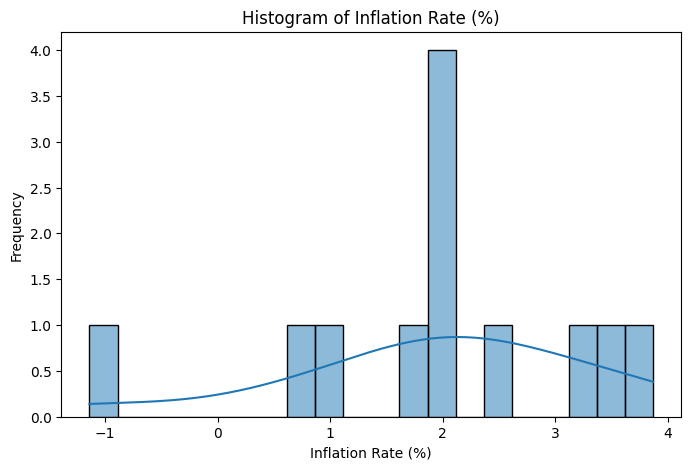

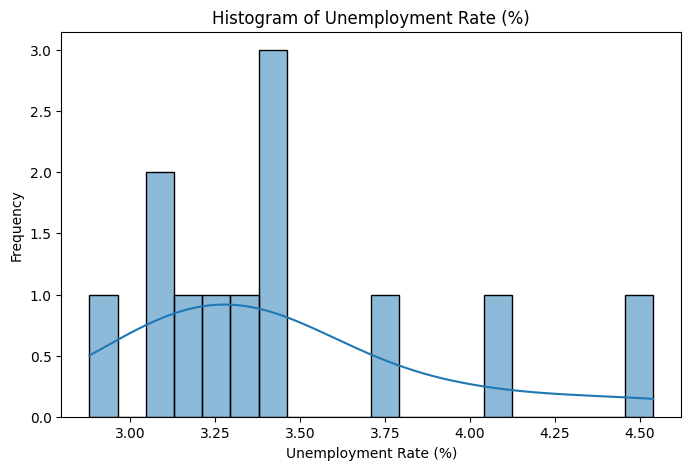

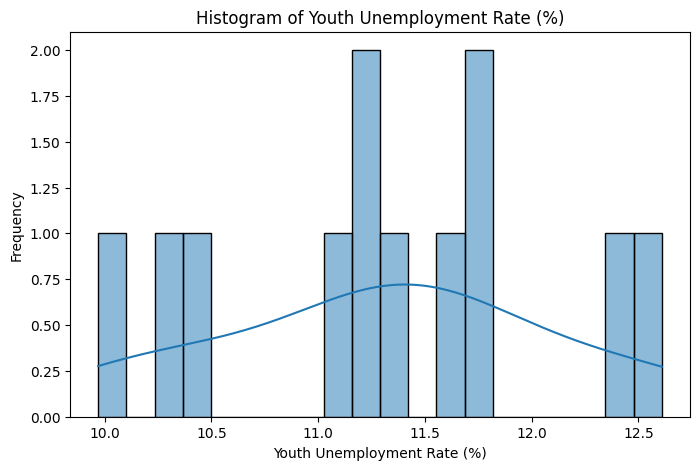

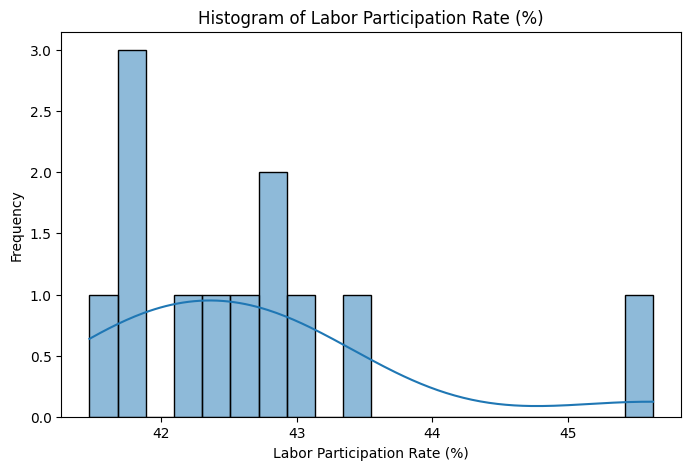

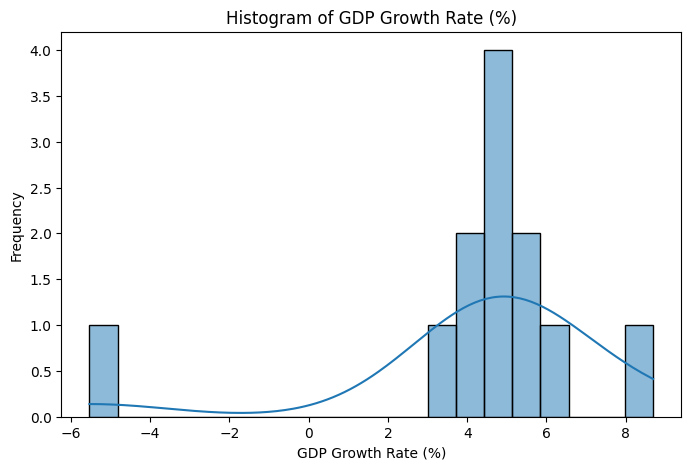

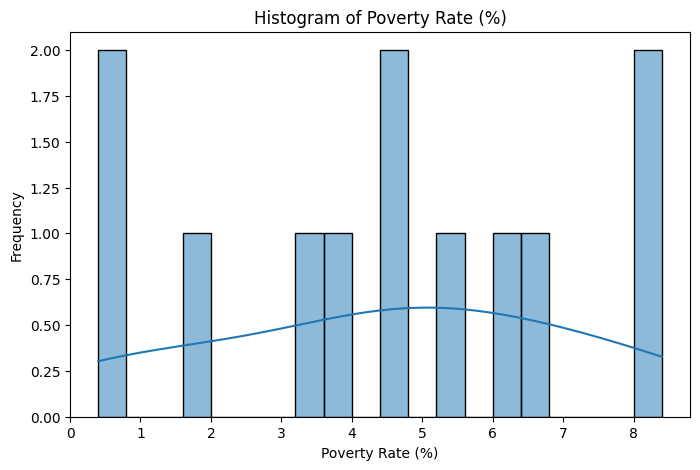

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'preprocessed_data' contains the dataset

# Selecting only the numerical columns
numerical_columns = ['Inflation Rate (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)',
                     'Labor Participation Rate (%)', 'GDP Growth Rate (%)', 'Poverty Rate (%)']

# Plotting histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(preprocessed_data[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## 2. Line plot


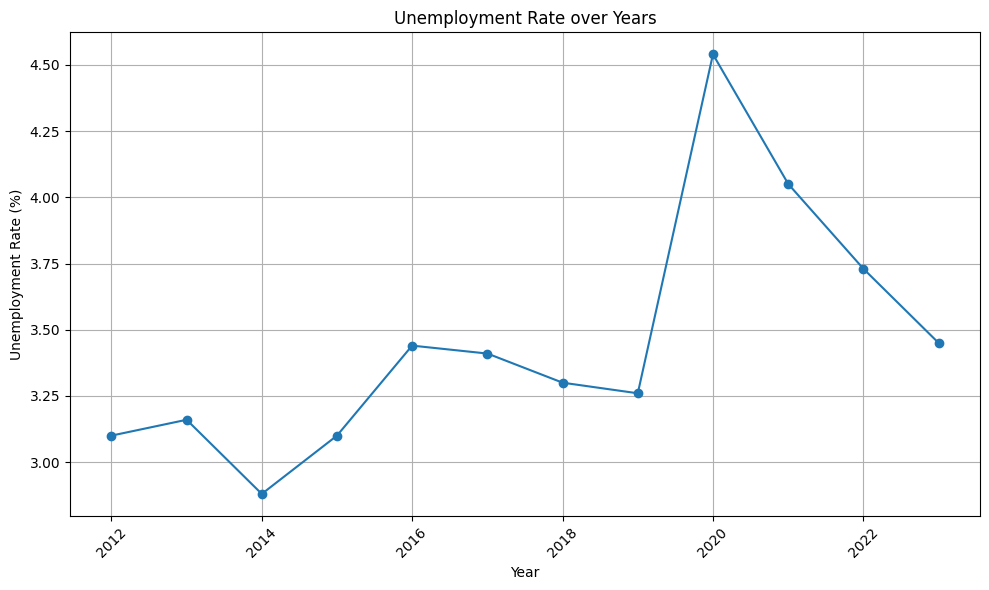

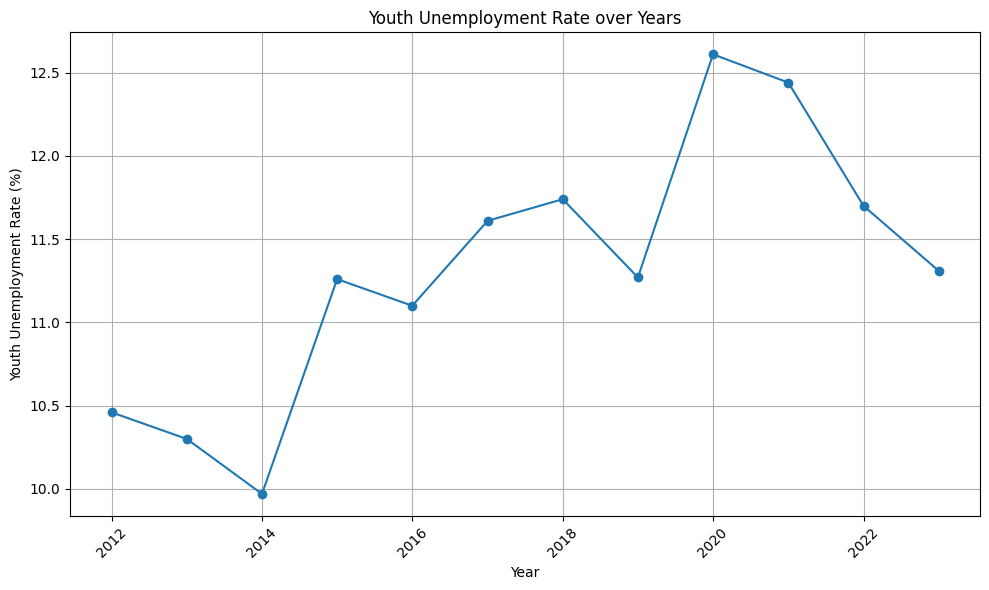

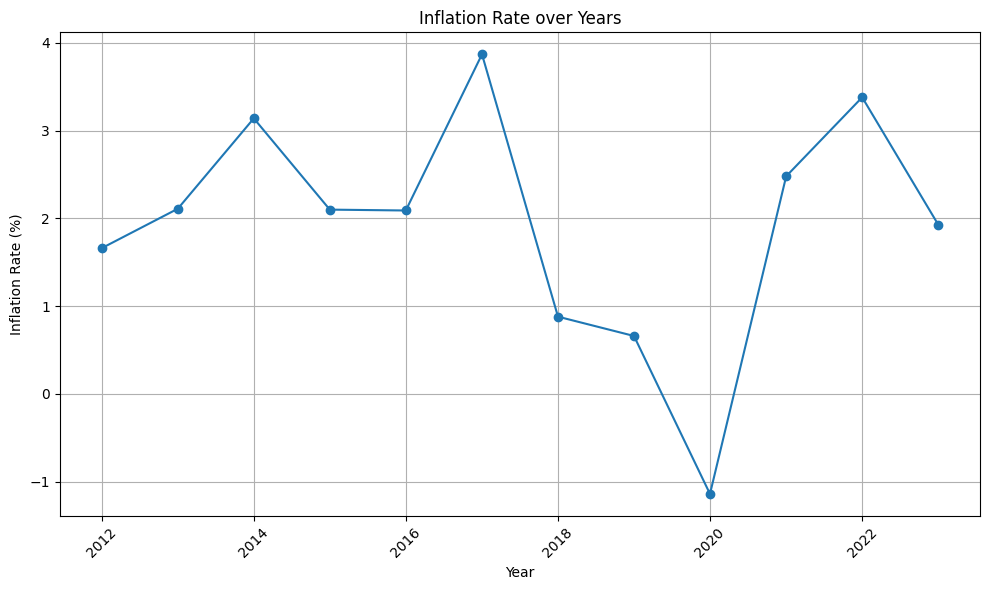

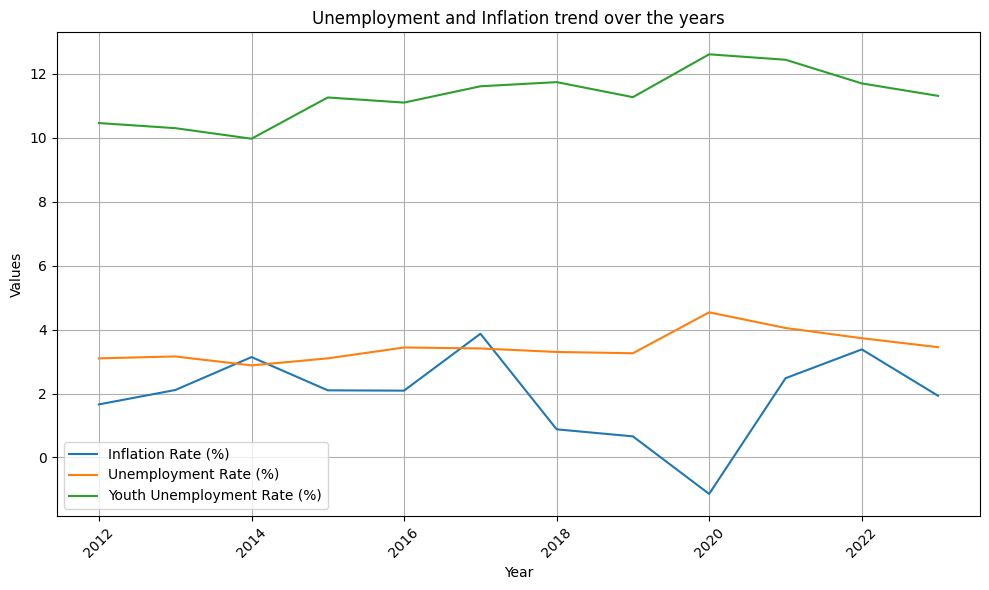

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Year' column to datetime if it's not in datetime format
preprocessed_data['Year'] = pd.to_datetime(preprocessed_data['Year'], format='%Y')

# Sort data by 'Year' for chronological plotting
preprocessed_data = preprocessed_data.sort_values('Year')

# Selecting only the numerical columns
numerical_columns = ['Inflation Rate (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)']

# Sort data by 'Year' for chronological plotting
preprocessed_data = preprocessed_data.sort_values('Year')

# Plotting GDP Growth Rate over the years
plt.figure(figsize=(10, 6))
plt.plot(preprocessed_data['Year'], preprocessed_data['Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Unemployment Rate over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Youth Unemployment Rate over the years
plt.figure(figsize=(10, 6))
plt.plot(preprocessed_data['Year'], preprocessed_data['Youth Unemployment Rate (%)'], marker='o', linestyle='-')
plt.title('Youth Unemployment Rate over Years')
plt.xlabel('Year')
plt.ylabel('Youth Unemployment Rate (%)')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Inflation Rate over the years
plt.figure(figsize=(10, 6))
plt.plot(preprocessed_data['Year'], preprocessed_data['Inflation Rate (%)'], marker='o', linestyle='-')
plt.title('Inflation Rate over Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting all numerical columns in a single line plot
plt.figure(figsize=(10, 6))
for col in numerical_columns:
    plt.plot(preprocessed_data['Year'], preprocessed_data[col], label=col)

plt.title('Unemployment and Inflation trend over the years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. Barplot

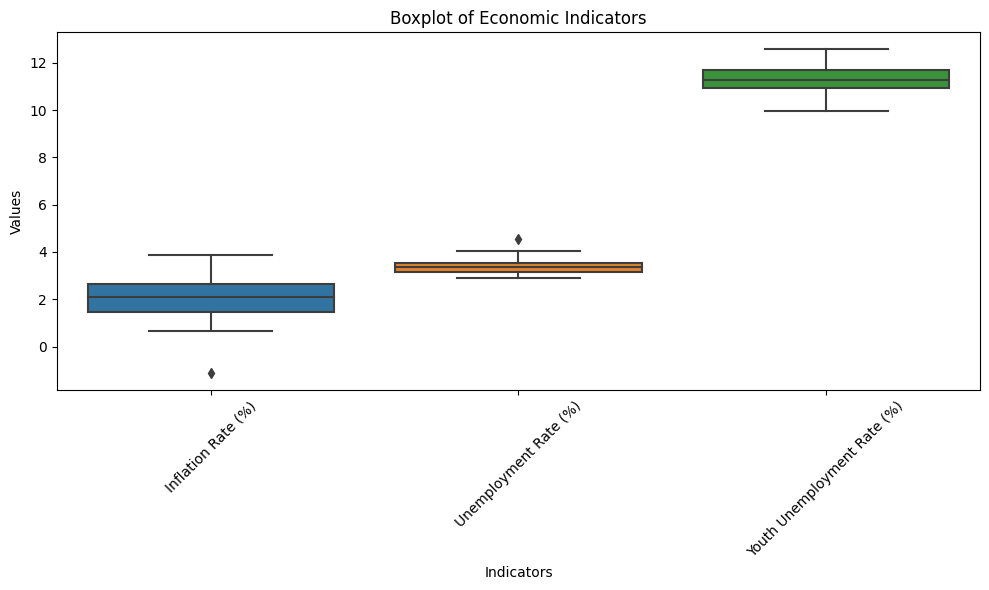

In [ ]:
# Creating boxplots for numerical columns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=preprocessed_data[numerical_columns])
plt.title('Boxplot of Economic Indicators')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.xlabel('Indicators')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# Bivariate Analysis
## 1. Scatter Plot

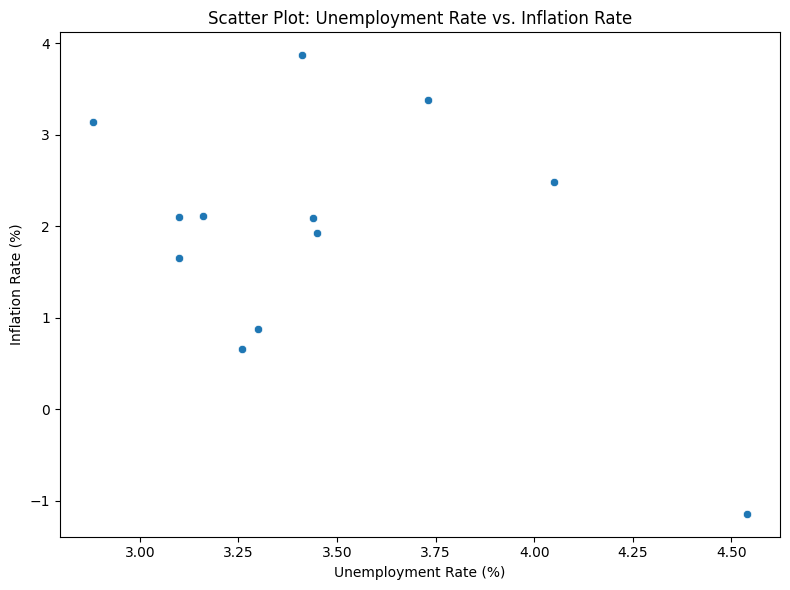

In [ ]:
# Scatter plot between Unemployment Rate and Inflation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment Rate (%)', y='Inflation Rate (%)', data=preprocessed_data)
plt.title('Scatter Plot: Unemployment Rate vs. Inflation Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.tight_layout()
plt.show()


## 2. Correlation matrices

Correlation Coefficient between Unemployment Rate and Inflation Rate: -0.439


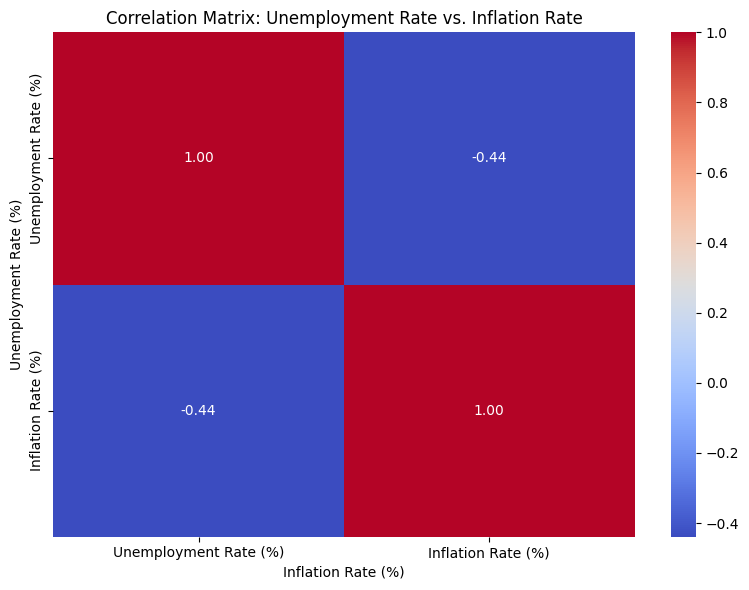

In [ ]:
# Calculate the correlation coefficient between the two variables
correlation_coefficient = preprocessed_data['Unemployment Rate (%)'].corr(preprocessed_data['Inflation Rate (%)'])
print(f"Correlation Coefficient between Unemployment Rate and Inflation Rate: {correlation_coefficient:.3f}")

# Selecting the columns of interest
selected_columns = ['Unemployment Rate (%)', 'Inflation Rate (%)']
numerical_columns = ['Inflation Rate (%)', 'Unemployment Rate (%)', 'Youth Unemployment Rate (%)', 'Population',
                     'Labor Participation Rate (%)', 'GDP Growth Rate (%)', 'Poverty Rate (%)']

# Creating a subset of the data with the selected columns
selected_data = preprocessed_data[selected_columns]

# Calculating the correlation matrix
correlation_matrix = selected_data.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Unemployment Rate vs. Inflation Rate')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()


The value of -0.439 suggests a moderate negative correlation. While not a strong correlation, it still indicates a tendency that as the Inflation Rate tends to increase, the Unemployment Rate tends to decrease to some extent, and vice versa.

For instance, during periods of high inflation (rising prices), there might be increased economic activity, potentially leading to lower unemployment due to increased demand for labor. Conversely, during times of low inflation or deflation, economic activity might slow down, potentially resulting in higher unemployment.

## **Further Analysis:**
**Causation vs. Correlation:** While correlation measures the relationship between variables, it doesn't imply causation. Further analysis, such as time-series modeling or econometric methods, could investigate the causal relationship between Inflation Rate and Unemployment Rate.

**Multifactorial Analysis:** Economic indicators often interact in complex ways. Exploring other variables or conducting multivariate analysis might reveal additional factors influencing both the Unemployment Rate and Inflation Rate.

## Correlation Heatmap

<ipython-input-20-966aaeb4b402>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessed_data.corr()


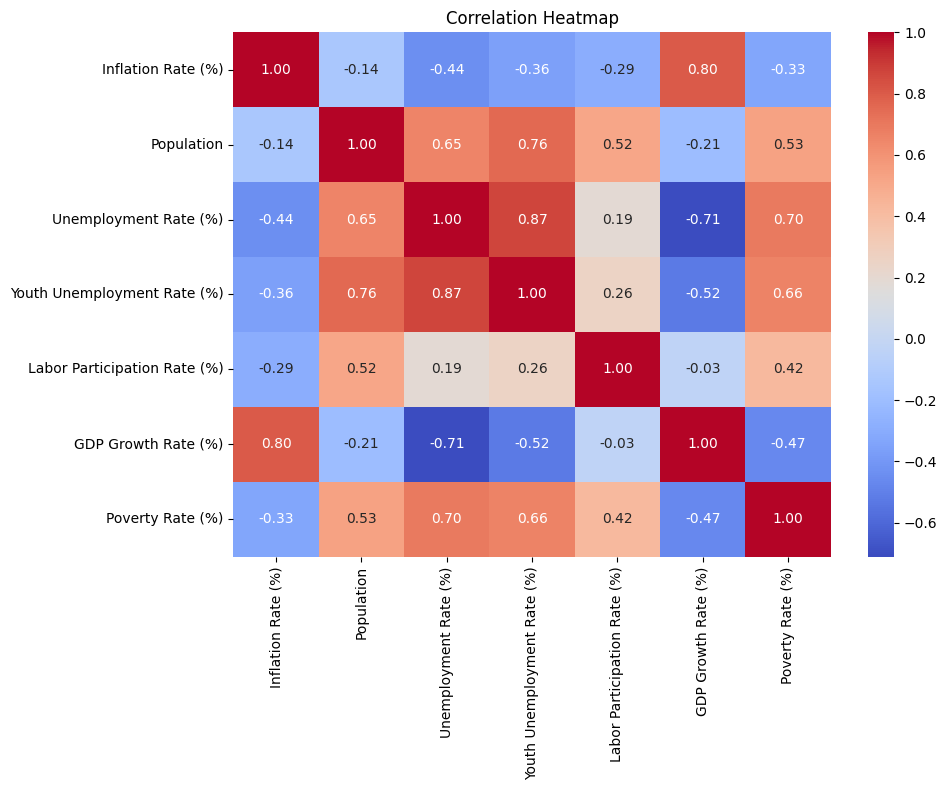

In [ ]:
# Calculate the correlation matrix
correlation_matrix = preprocessed_data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Dynamic Time Warping between Unemployment Rate and Inflation Rate

In [ ]:
!pip install fastdtw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512577 sha256=38185c153e1a5e2fa1bbbd0f9aa838bdc0a4ab53cb71e00238384a9a083ae490
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


DTW Distance between Unemployment Rate and Inflation Rate: 18.720000000000002


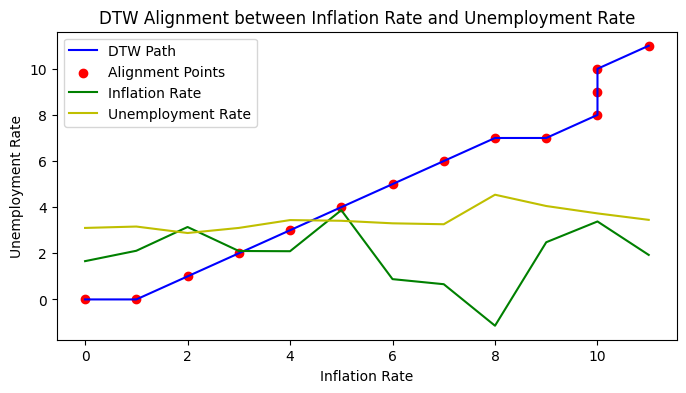

In [ ]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import pandas as pd


# Extract 'Inflation Rate' and 'Unemployment Rate' columns as NumPy arrays
inflation_rate = preprocessed_data['Inflation Rate (%)'].values.reshape(-1, 1)  # Reshape to a column vector
unemployment_rate = preprocessed_data['Unemployment Rate (%)'].values.reshape(-1, 1)  # Reshape to a column vector

# Compute DTW distance between the two time series
distance, path = fastdtw(inflation_rate, unemployment_rate, dist=euclidean)

print(f"DTW Distance between Unemployment Rate and Inflation Rate: {distance}")

# Extract indices from the path
indices_x = [point[0] for point in path]
indices_y = [point[1] for point in path]

# Plot the DTW alignment path
plt.figure(figsize=(8, 4))
plt.plot(indices_x, indices_y, 'b-', label='DTW Path')
plt.scatter(indices_x, indices_y, c='r', marker='o', label='Alignment Points')
plt.plot(inflation_rate, 'g', label='Inflation Rate')
plt.plot(unemployment_rate, 'y', label='Unemployment Rate')
plt.legend()
plt.title('DTW Alignment between Inflation Rate and Unemployment Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Unemployment Rate')
plt.show()


In [ ]:
!pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.0/745.0 kB 7.7 MB/s eta 0:00:00


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<Axes: xlabel='Index', ylabel='Query value'>

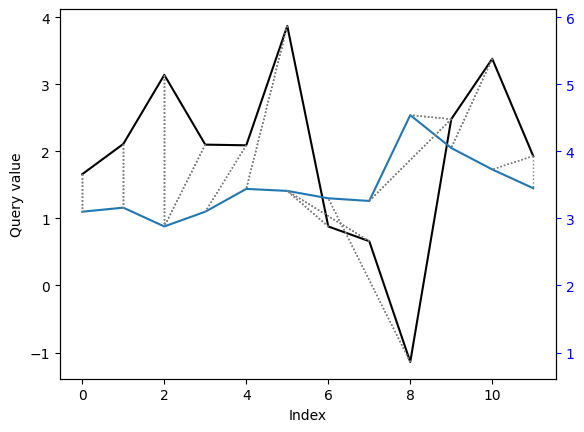

In [ ]:
from dtw import *

dtw(inflation_rate, unemployment_rate, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

**Moderate Dissimilarity:** A DTW distance of 18.72 indicates a moderate level of dissimilarity between the Unemployment Rate and Inflation Rate time series. It implies that the shapes, trends, or fluctuations in these economic indicators are somewhat different or not entirely synchronized.

**Divergence in Trends:** The value suggests that while there might be some commonalities or relationships between the Unemployment Rate and Inflation Rate, they do not perfectly align or follow similar patterns over time. This could mean that changes in one indicator may not consistently correspond to similar changes in the other.

**Potential Lag or Shift:** The higher distance value may indicate a temporal shift or lag between the fluctuations in the Unemployment Rate and Inflation Rate. It suggests that changes in one indicator might occur at different times or rates compared to the other.

**Areas for Further Investigation:** While the distance suggests dissimilarity, it also presents an opportunity for further investigation. Analyzing specific time periods or exploring additional factors that might influence these economic indicators could help uncover reasons for their divergence.

#Time Series Forecasting (Inflation Rate) ARIMA

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# Assuming 'df' is your DataFrame and you're forecasting 'Inflation Rate (%)'
df = pd.read_csv('/content/drive/MyDrive/Dataset/PDS_data1.csv')
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].str.rstrip('%').astype('float') / 100.0  # Convert percentage strings to floats
df = df.dropna(subset=['Inflation Rate (%)'])  # Remove rows with NaN Inflation rates
df.sort_values('Year', inplace=True)  # Ensure data is in chronological order

time_series = df.set_index('Year')['Inflation Rate (%)']  # Define the time series


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

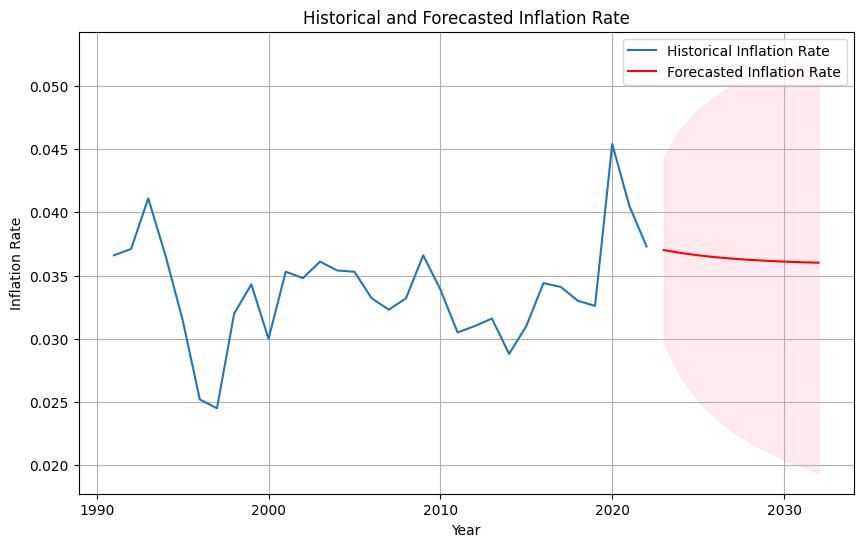

,Year,Forecasted Inflation Rate,95% CI Lower,95% CI Upper
32,2023,0.037014,0.029660,0.044369
33,2024,0.036785,0.026931,0.046638
34,2025,0.036601,0.025107,0.048094
35,2026,0.036453,0.023752,0.049154
36,2027,0.036334,0.022688,0.049981
37,2028,0.036239,0.021818,0.050660
38,2029,0.036163,0.021087,0.051239
39,2030,0.036102,0.020456,0.051748
40,2031,0.036053,0.019901,0.052205
41,2032,0.036014,0.019403,0.052624


In [ ]:
n_forecast = 10

# Ensure forecast_years is defined correctly
last_year = max(time_series.index)
forecast_years = np.arange(last_year + 1, last_year + 1 + n_forecast)

# ARIMA model and forecast
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()
forecast_result = model_fit.get_forecast(steps=n_forecast)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence intervals

# Visualizing the historical data along with forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Inflation Rate')
plt.plot(forecast_years, forecast, color='red', label='Forecasted Inflation Rate')
plt.fill_between(forecast_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Historical and Forecasted Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()

# Returning the forecast values and the 95% confidence intervals
forecast_results = pd.DataFrame({'Year': forecast_years, 'Forecasted Inflation Rate': forecast, '95% CI Lower': conf_int.iloc[:, 0], '95% CI Upper': conf_int.iloc[:, 1]})
forecast_results


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

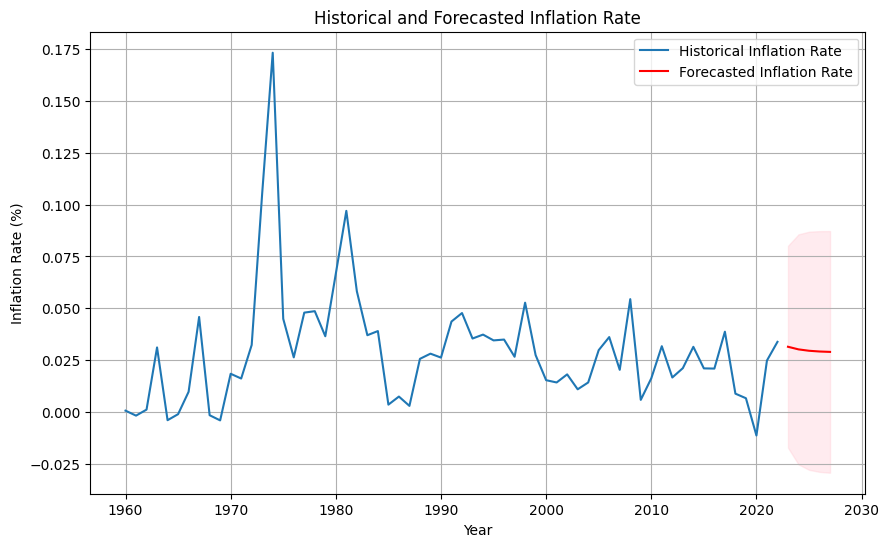

,Year,Forecasted Inflation Rate (%),95% CI Lower (%),95% CI Upper (%)
63,2023,0.031427,-0.017273,0.080128
64,2024,0.030166,-0.025327,0.085659
65,2025,0.029496,-0.027945,0.086938
66,2026,0.029140,-0.028932,0.087213
67,2027,0.028951,-0.029347,0.087249


In [ ]:
# Redefining the timeline for the forecast years
last_year = time_series.index[-1]
forecast_years = np.arange(last_year + 1, last_year + 1 + n_forecast)

# Redefining and fitting the ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting next 5 years again
forecast_result = model_fit.get_forecast(steps=n_forecast)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence intervals

# Visualizing the historical data along with forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Inflation Rate')
plt.plot(forecast_years, forecast, color='red', label='Forecasted Inflation Rate')
plt.fill_between(forecast_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Historical and Forecasted Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Returning the forecast values and the 95% confidence intervals
forecast_results = pd.DataFrame({'Year': forecast_years, 'Forecasted Inflation Rate (%)': forecast, '95% CI Lower (%)': conf_int.iloc[:, 0], '95% CI Upper (%)': conf_int.iloc[:, 1]})
forecast_results


#Time Series Forecasting (Unemployment Rate) ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

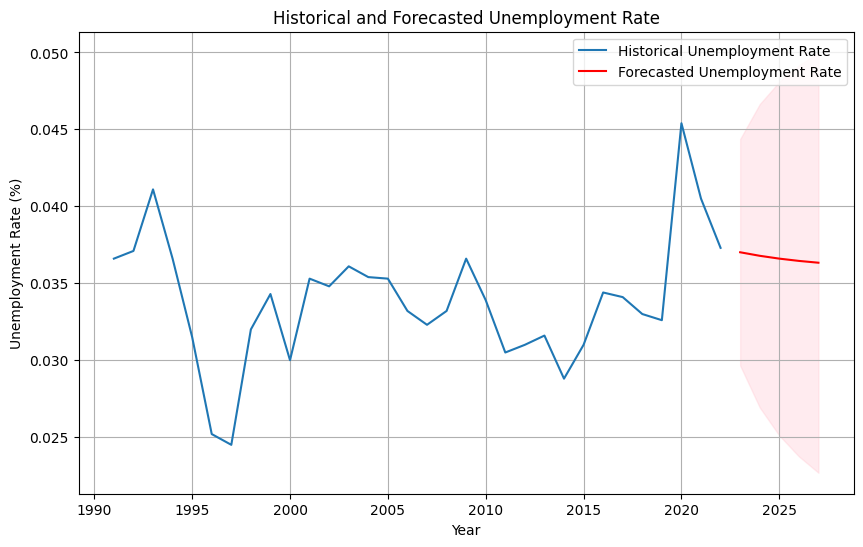

,Year,Forecasted Unemployment Rate,95% CI Lower,95% CI Upper
32,2023,0.037014,0.029660,0.044369
33,2024,0.036785,0.026931,0.046638
34,2025,0.036601,0.025107,0.048094
35,2026,0.036453,0.023752,0.049154
36,2027,0.036334,0.022688,0.049981


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare the data
df = pd.read_csv('/content/drive/MyDrive/Dataset/PDS_data1.csv')
df['Unemployment Rate (%)'] = df['Unemployment Rate (%)'].str.rstrip('%').astype('float') / 100.0  # Convert percentage strings to floats
df = df.dropna(subset=['Unemployment Rate (%)'])  # Remove rows with NaN values in the column of interest
df.sort_values('Year', inplace=True)  # Make sure data is sorted by time

# Define the time series
time_series = df.set_index('Year')['Unemployment Rate (%)']

# Define the number of periods to forecast
n_forecast = 5

# Generate forecast years assuming your data is yearly and sequential
last_year = max(df['Year'])
forecast_years = np.arange(last_year + 1, last_year + 1 + n_forecast)

# Define and fit the ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # You might need to change the order based on model diagnostics
model_fit = model.fit()

# Forecasting next years
forecast_result = model_fit.get_forecast(steps=n_forecast)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence intervals

# Visualizing the historical data along with forecasts
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Unemployment Rate')
plt.plot(forecast_years, forecast, color='red', label='Forecasted Unemployment Rate')
plt.fill_between(forecast_years, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Historical and Forecasted Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Returning the forecast values and the 95% confidence intervals
forecast_results = pd.DataFrame({'Year': forecast_years, 'Forecasted Unemployment Rate': forecast, '95% CI Lower': conf_int.iloc[:, 0], '95% CI Upper': conf_int.iloc[:, 1]})
forecast_results
